# 1 - Importing Libraries

In [493]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
warnings.filterwarnings("ignore")

# 2- Loading the Dataset

In [496]:
df = pd.read_csv('../data/credit_risk_dataset.csv')
# moving 2 directory higher since data is in other folder(..)

In [498]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


# 3 - Understanding the Dataset

In [501]:
df.shape   # there are 32581 records of customer in dataset with 12 differnt features

(32581, 12)

In [503]:
df.dtypes # 3 categorical columns are there other are all numerical in nature

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [505]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [507]:
df.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [511]:
# Statistical summary of numerical columns
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


# 4- Cleaning the Data

# (A) - Checking/Removing Null Values

In [515]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [517]:
# Filling Null values using Simple imputer

In [519]:
transformer = ColumnTransformer(
    transformers = [
        ("simp1",SimpleImputer(strategy = "mean"),["person_emp_length"]),
        ("simp2",SimpleImputer(strategy = "most_frequent"),["loan_int_rate"])
    ],remainder='passthrough'
)


df[["person_emp_length", "loan_int_rate"]] = transformer.fit_transform(df[["person_emp_length", "loan_int_rate"]])


In [521]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# (B) - Checking and Removing Duplicate rows

In [524]:
df.duplicated().sum()

165

In [526]:
df.drop_duplicates(inplace=True)

In [528]:
df.duplicated().sum()

0

In [530]:
# (C) - Transforming Column Names

In [532]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [534]:
df.rename(columns={"loan_amnt": "loan_amount"}, inplace=True)
df.rename(columns={"person_home_ownership": "home_ownership_type"}, inplace=True)


In [536]:
df.rename(columns = {"person_emp_length":"employement_duration"},inplace=True)

In [538]:
df.rename(columns = {"cb_person_default_on_file":"loan_default"},inplace=True)
df.rename(columns = {"cb_person_cred_hist_length":"credit_history_duration"},inplace=True)

In [540]:
df

,person_age,person_income,home_ownership_type,employement_duration,loan_intent,loan_grade,loan_amount,loan_int_rate,loan_status,loan_percent_income,loan_default,credit_history_duration
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [542]:
df

,person_age,person_income,home_ownership_type,employement_duration,loan_intent,loan_grade,loan_amount,loan_int_rate,loan_status,loan_percent_income,loan_default,credit_history_duration
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# (C) - Checking and Removing Outliers

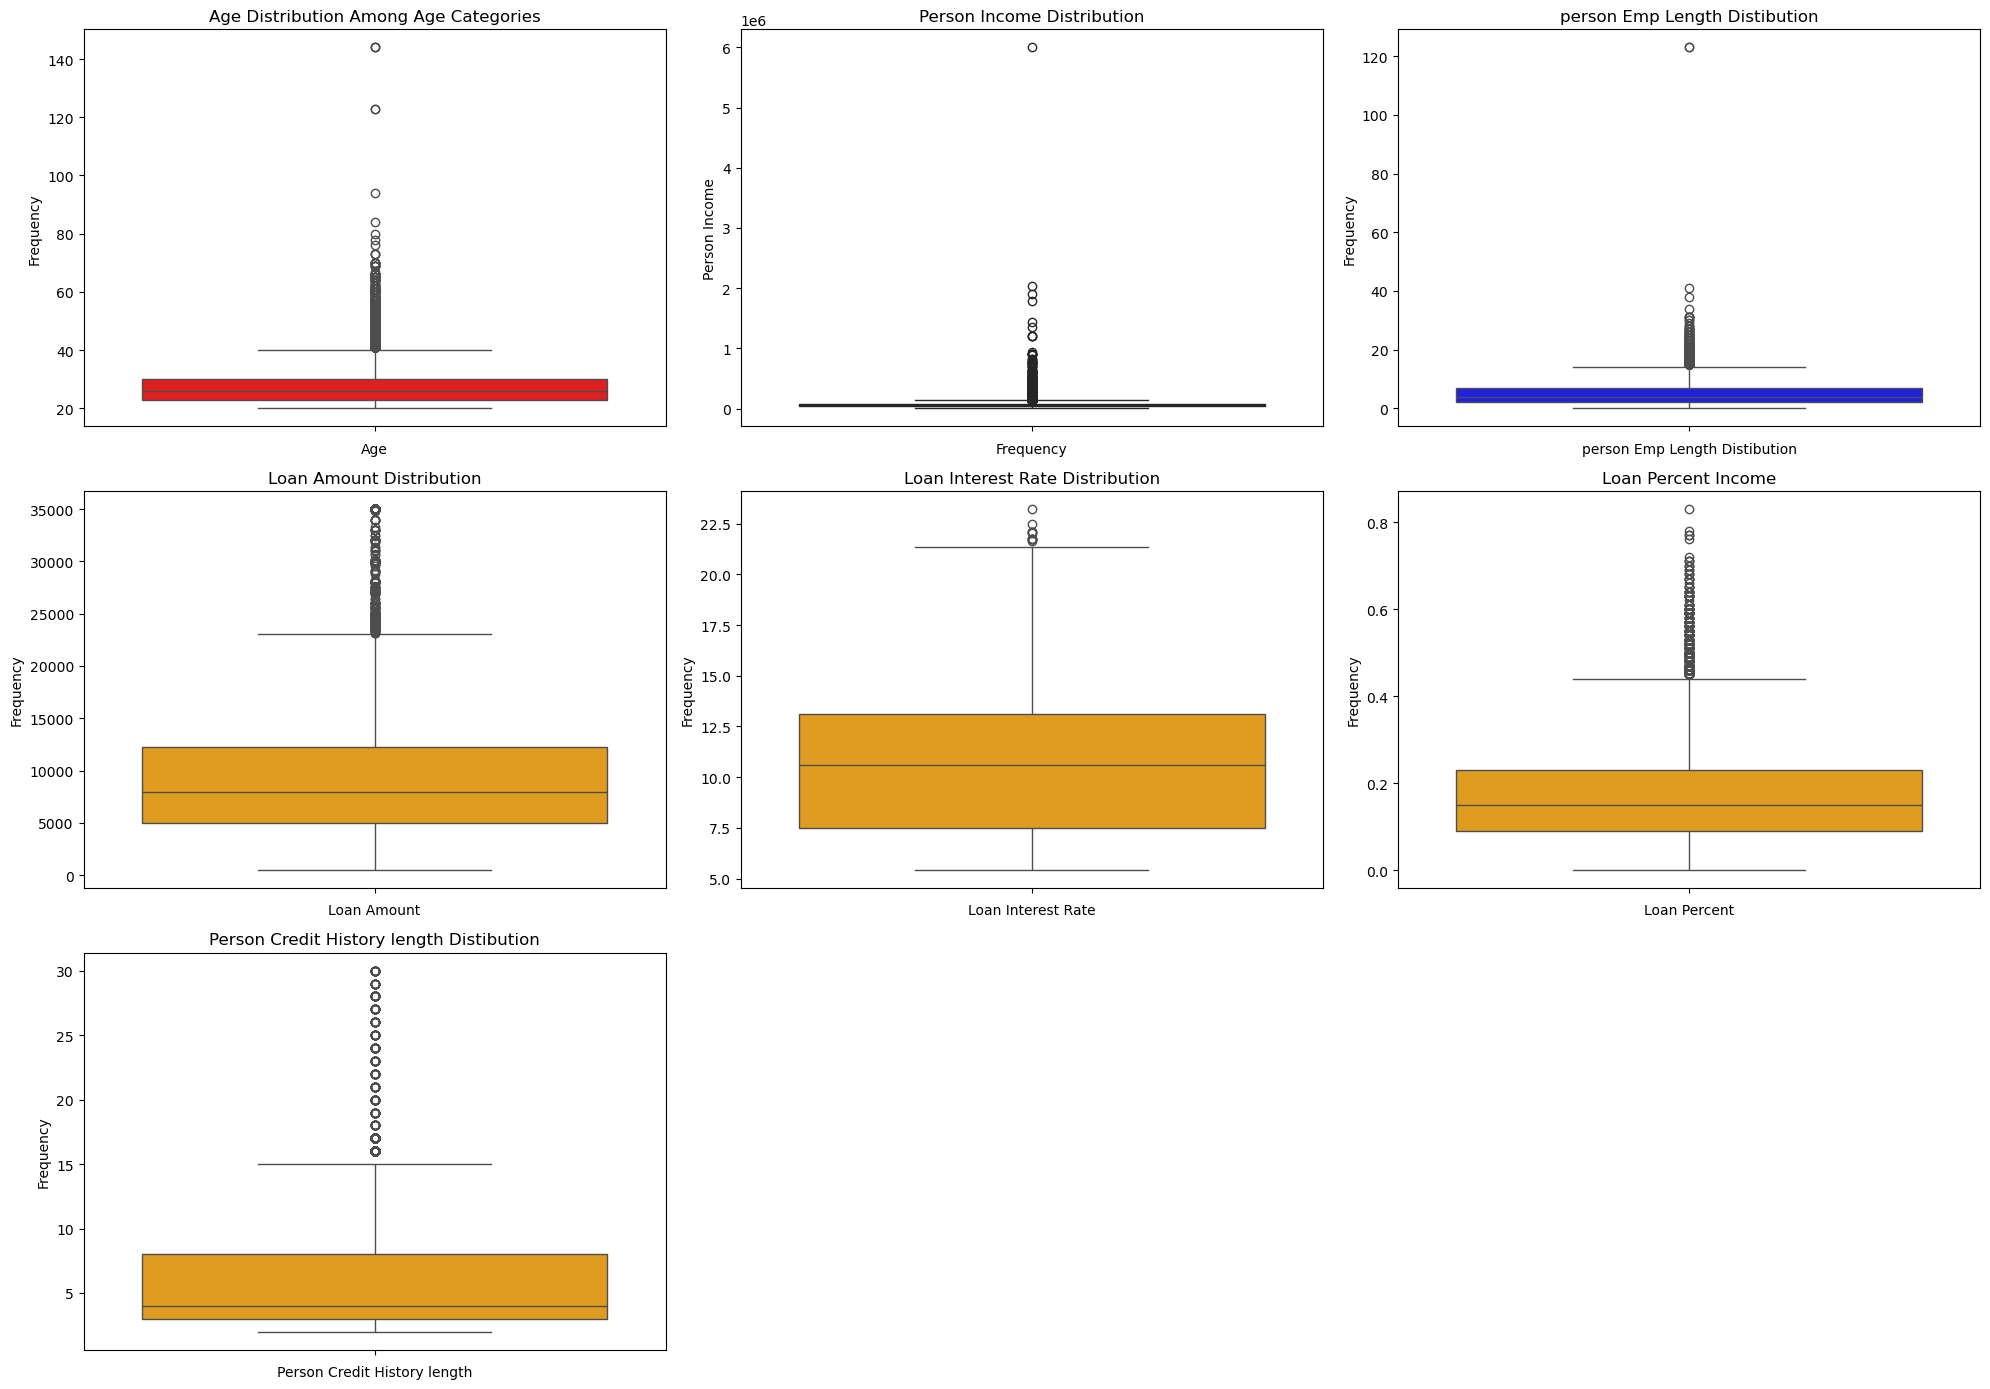

In [545]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 14))
plt.subplot(3,3,1)
sns.boxplot(df["person_age"], color="red")  # color should be a string, not a list
plt.title("Age Distribution Among Age Categories")
plt.xlabel("Age")
plt.ylabel("Frequency")



plt.subplot(3,3,2)
sns.boxplot(df["person_income"], color="purple")  # color should be a string, not a list
plt.title("Person Income Distribution")
plt.ylabel("Person Income")
plt.xlabel("Frequency")





plt.subplot(3,3,3)
sns.boxplot(df["employement_duration"], color="blue")  # color should be a string, not a list
plt.title("person Emp Length Distibution")
plt.xlabel("person Emp Length Distibution")
plt.ylabel("Frequency")



plt.subplot(3,3,4)
sns.boxplot(df["loan_amount"], color="orange")  # color should be a string, not a list
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")






plt.subplot(3,3,5)
sns.boxplot(df["loan_int_rate"], color="orange")  # color should be a string, not a list
plt.title("Loan Interest Rate Distribution")
plt.xlabel("Loan Interest Rate")
plt.ylabel("Frequency")



plt.subplot(3,3,6)
sns.boxplot(df["loan_percent_income"],color="orange")  # color should be a string, not a list
plt.title("Loan Percent Income")
plt.xlabel("Loan Percent")
plt.ylabel("Frequency")




plt.subplot(3,3,7)
sns.boxplot(df["credit_history_duration"], color="orange")  # color should be a string, not a list
plt.title("Person Credit History length Distibution")
plt.xlabel("Person Credit History length")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [546]:
#Observations-:


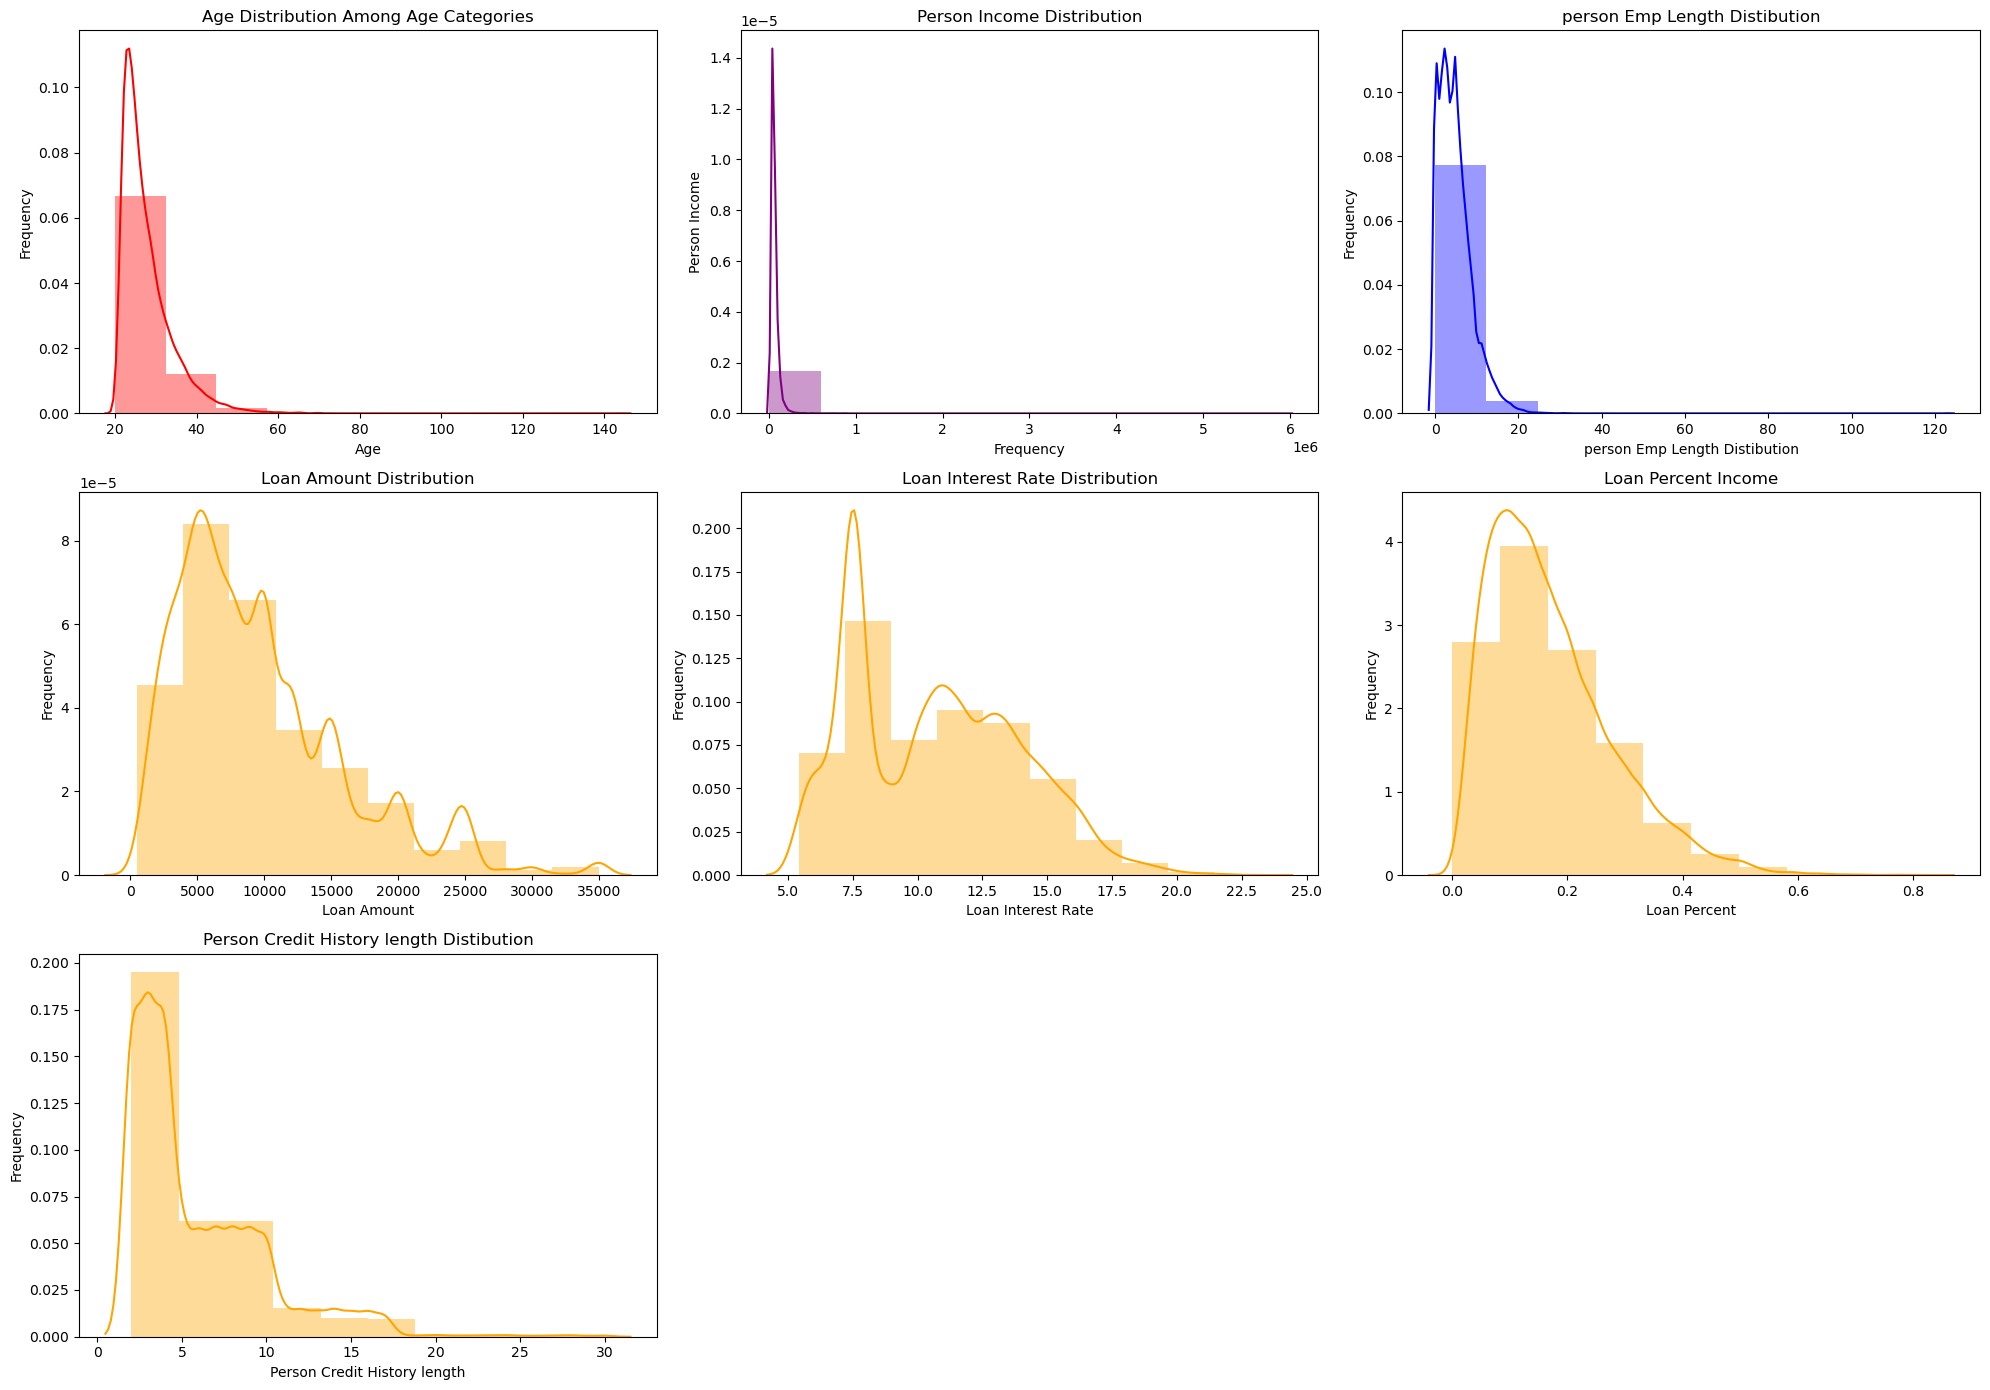

In [547]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 14))
plt.subplot(3,3,1)
sns.distplot(df["person_age"], bins=10, color="red")  # color should be a string, not a list
plt.title("Age Distribution Among Age Categories")
plt.xlabel("Age")
plt.ylabel("Frequency")



plt.subplot(3,3,2)
sns.distplot(df["person_income"], bins=10, color="purple")  # color should be a string, not a list
plt.title("Person Income Distribution")
plt.ylabel("Person Income")
plt.xlabel("Frequency")





plt.subplot(3,3,3)
sns.distplot(df["employement_duration"], bins=10, color="blue")  # color should be a string, not a list
plt.title("person Emp Length Distibution")
plt.xlabel("person Emp Length Distibution")
plt.ylabel("Frequency")



plt.subplot(3,3,4)
sns.distplot(df["loan_amount"], bins=10, color="orange")  # color should be a string, not a list
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")






plt.subplot(3,3,5)
sns.distplot(df["loan_int_rate"], bins=10, color="orange")  # color should be a string, not a list
plt.title("Loan Interest Rate Distribution")
plt.xlabel("Loan Interest Rate")
plt.ylabel("Frequency")



plt.subplot(3,3,6)
sns.distplot(df["loan_percent_income"], bins=10, color="orange")  # color should be a string, not a list
plt.title("Loan Percent Income")
plt.xlabel("Loan Percent")
plt.ylabel("Frequency")




plt.subplot(3,3,7)
sns.distplot(df["credit_history_duration"], bins=10, color="orange")  # color should be a string, not a list
plt.title("Person Credit History length Distibution")
plt.xlabel("Person Credit History length")
plt.ylabel("Frequency")\

plt.tight_layout()
plt.show()

In [550]:
# Observations = 
# All distribution is Skewed right so we will use IQR method to remove outliers

# - Capping the Outliers

In [552]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Cap the values
    df[column] = np.where(df[column] < lower, lower,
                          np.where(df[column] > upper, upper, df[column]))
    return df

# Apply to each column
for col in ["person_age", "person_income", "employement_duration", 
            "loan_amount", "loan_int_rate", "loan_percent_income", 
            "credit_history_duration"]:
    df = remove_outliers_iqr(df, col)


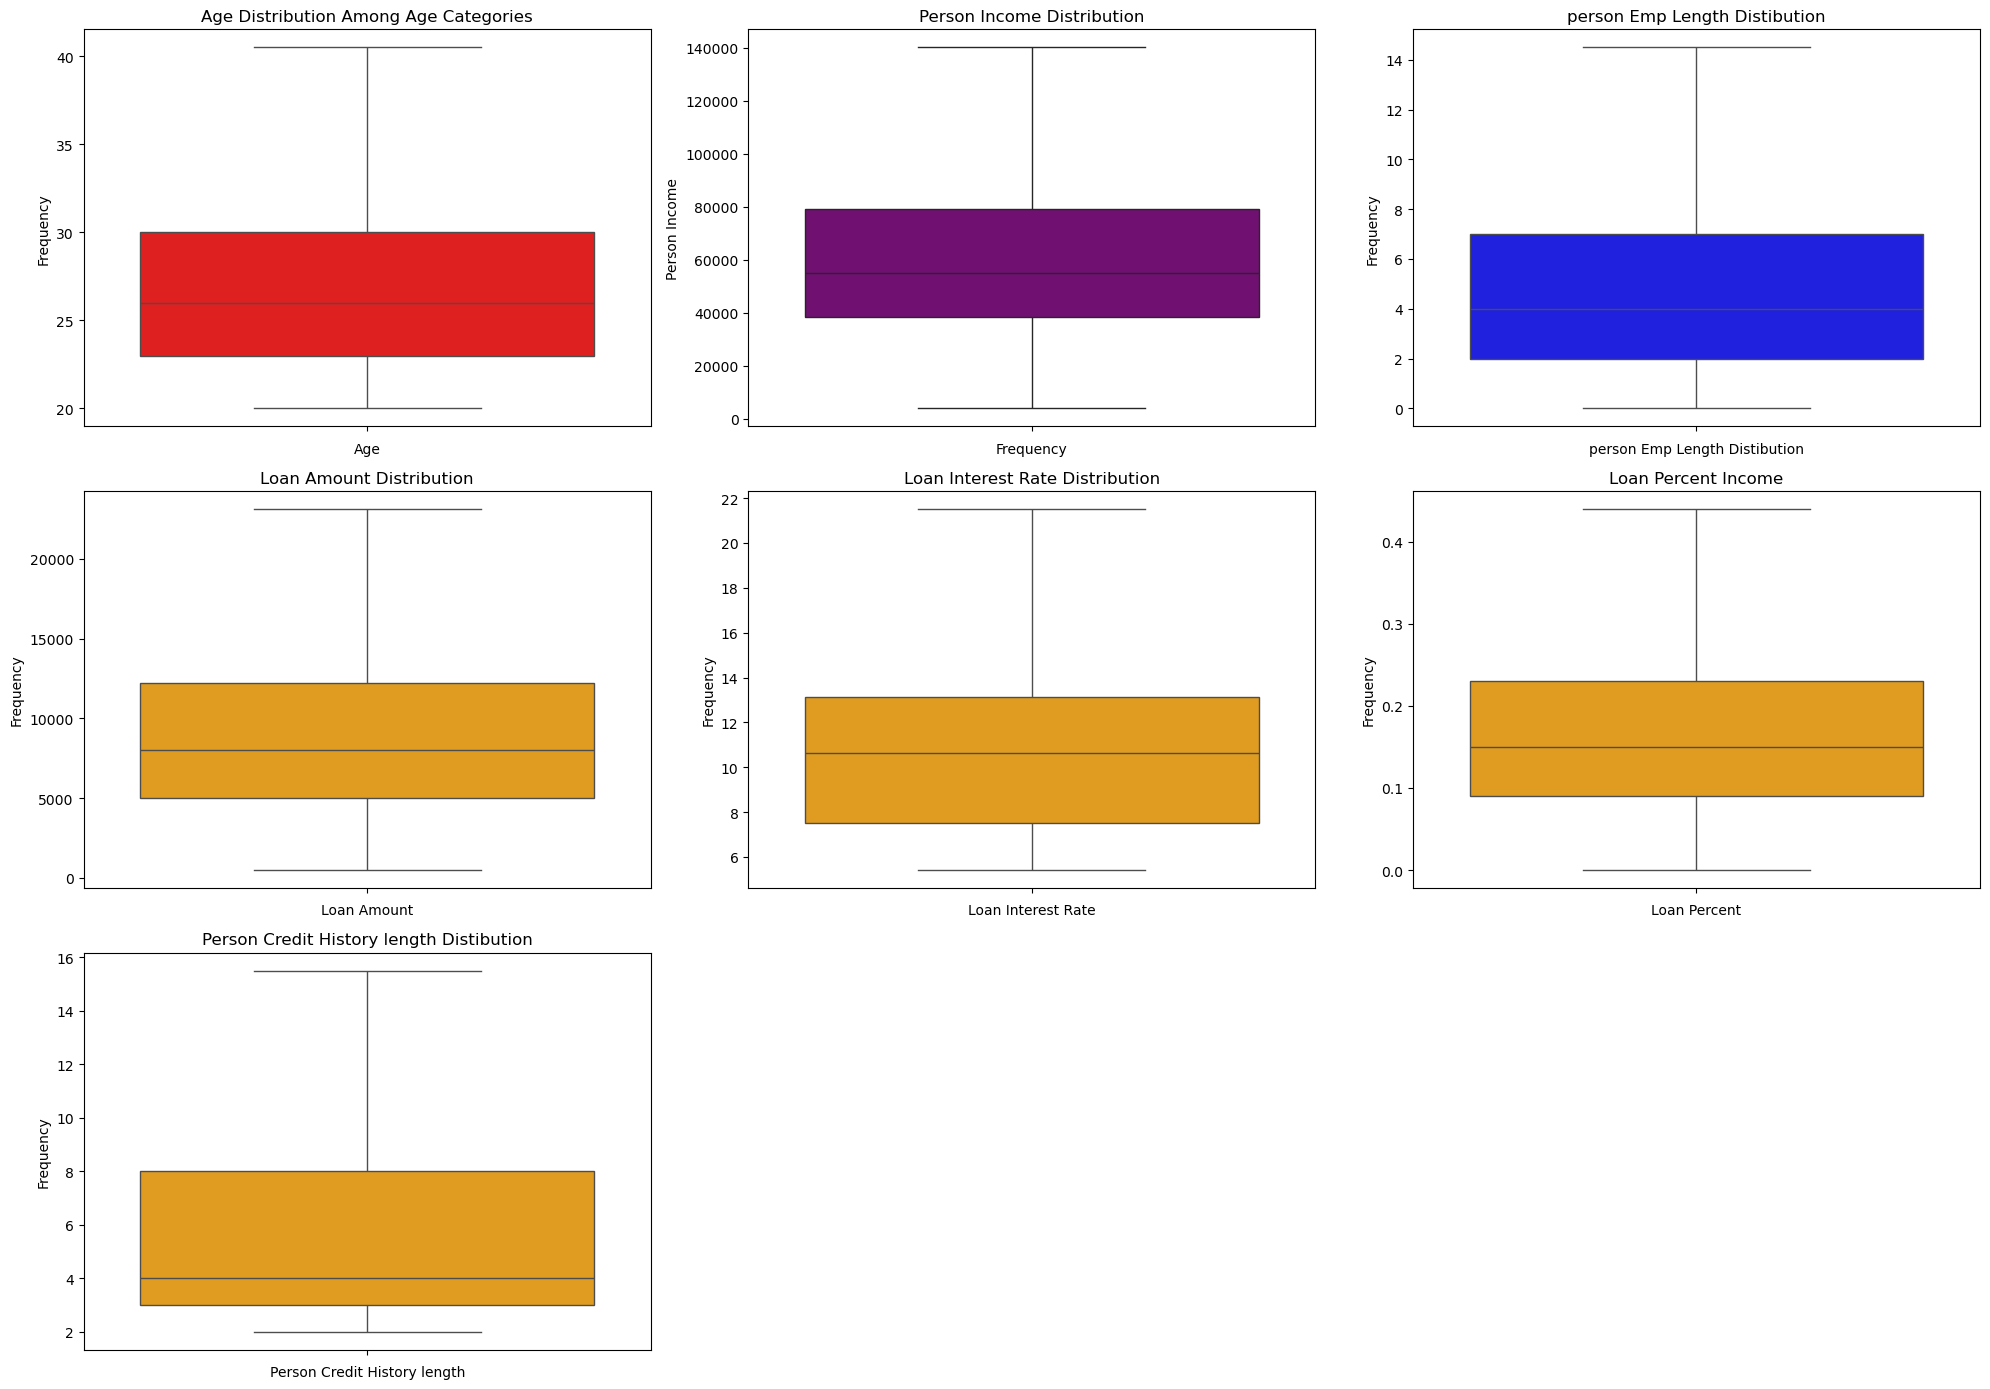

In [561]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 14))
plt.subplot(3,3,1)
sns.boxplot(df["person_age"], color="red")  # color should be a string, not a list
plt.title("Age Distribution Among Age Categories")
plt.xlabel("Age")
plt.ylabel("Frequency")



plt.subplot(3,3,2)
sns.boxplot(df["person_income"], color="purple")  # color should be a string, not a list
plt.title("Person Income Distribution")
plt.ylabel("Person Income")
plt.xlabel("Frequency")





plt.subplot(3,3,3)
sns.boxplot(df["employement_duration"], color="blue")  # color should be a string, not a list
plt.title("person Emp Length Distibution")
plt.xlabel("person Emp Length Distibution")
plt.ylabel("Frequency")



plt.subplot(3,3,4)
sns.boxplot(df["loan_amount"], color="orange")  # color should be a string, not a list
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")






plt.subplot(3,3,5)
sns.boxplot(df["loan_int_rate"], color="orange")  # color should be a string, not a list
plt.title("Loan Interest Rate Distribution")
plt.xlabel("Loan Interest Rate")
plt.ylabel("Frequency")



plt.subplot(3,3,6)
sns.boxplot(df["loan_percent_income"],color="orange")  # color should be a string, not a list
plt.title("Loan Percent Income")
plt.xlabel("Loan Percent")
plt.ylabel("Frequency")




plt.subplot(3,3,7)
sns.boxplot(df["credit_history_duration"], color="orange")  # color should be a string, not a list
plt.title("Person Credit History length Distibution")
plt.xlabel("Person Credit History length")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# 5 - Saving Preprocessed data for EDA

In [581]:
df.to_csv("/Users/prabhsandhu/Downloads/customer-credit-risk-optimization/data/cleaned_data.csv", index=False)